# Intro

Now we're ready to try some classical classification methods on our data. The features are density in different cut off radiuses and normalized kinetic energy of each particle.
We want to train the data with some models, as our data has quite high bias means the Number of OUT class particles is about 4 times of the IN class particles so we forced to select more particles from the IN class and our training is on a sample of 60000 particles of the hole simulation which half of them are OUT halo and other belongs to the IN class.

In [13]:
import numpy as np
import pandas as pd
import timeit
%alias_magic t timeit

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


# Data

Importing our data, Including X and Y matrices.

for each particle: 

X = $(\delta(rc=0.8),
      \delta(rc=1.2),
      ...,
      \delta(rc=4.8),
      v^2 ) $
      
Y = 0 or 1

In [14]:
data = pd.read_csv(r'C:\Users\Saba\Documents\ML project\Full_particle_Data\Features60(δ).csv')

X, Y = data.iloc[:,2:], data['In_halo']
print(X)
print(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state= 0)

print(len(X_train))
print(len(X_test))
print(len(Y))

       den_rc=0.8  den_rc=1.2  den_rc=1.6  den_rc=2  den_rc=2.4  den_rc=2.8  \
0       -0.000684   -0.020199   -0.011283 -0.012361   -0.011563   -0.012744   
1        0.002344   -0.016610   -0.007876 -0.009066   -0.011563   -0.012108   
2        0.002344   -0.022891   -0.014311 -0.011973   -0.008759   -0.007518   
3       -0.003712   -0.015713   -0.015447 -0.013330   -0.012124   -0.013662   
4        0.014457   -0.013021   -0.010526 -0.009648   -0.009545   -0.009848   
...           ...         ...         ...       ...         ...         ...   
59995   -0.018854   -0.033658   -0.028695 -0.019338   -0.016386   -0.014015   
59996    0.005372   -0.022891   -0.013176 -0.018950   -0.013021   -0.011755   
59997   -0.027938   -0.016610   -0.012797 -0.013330   -0.016274   -0.015428   
59998   -0.024910   -0.029172   -0.028317 -0.018369   -0.019863   -0.017406   
59999   -0.079418   -0.039939   -0.033995 -0.023020   -0.018966   -0.015640   

       den_rc=3.2  den_rc=3.6  den_rc=4  den_rc=4.4

In [15]:
#converting the dataframes to numpy arrays

X_test = np.array(X_test)
X_train = np.array(X_train)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)
X = np.array(X)
Y = np.array(Y)

**It is also worth doing to upload a completely random sample which is biased over the OUT class and then give more weight to the In class to avoid a high variance.**

Here I'm uploading this sample for mentioned purpose:

In [4]:
from sklearn import preprocessing

data_f = pd.read_csv(r'C:\Users\Saba\Documents\ML project\Full_particle_Data\Features.csv')
den0 = 80.621568

X_f, Y_f = data_f.iloc[:,2:], data_f['In_halo']
#X_f.replace(X_f.iloc[:,:-1], X_f.iloc[:,:-1] - den0)
X_f.iloc[:,:-1] = X_f.iloc[:,:-1] - den0
#Normalizing the velocities:

# Create v, where v the 'scores' column's values as floats
v = data_f[['v^2']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
v_scaled = min_max_scaler.fit_transform(v)

# Run the normalizer on the dataframe
v = pd.DataFrame(v_scaled)
X_f.iloc[:,-1] = v

#X_f.replace(X_f.iloc[:,-1],v)
print(X_f)
print(Y_f)


from sklearn.model_selection import train_test_split
X_train_f, X_test_f, Y_train_f, Y_test_f  = train_test_split(X_f, Y_f, random_state= 0)

print(len(X_train_f))
print(len(X_test_f))
print(len(Y_f))

       den_rc=0.8  den_rc=1.2  den_rc=1.6  den_rc=2  den_rc=2.4  den_rc=2.8  \
0       -0.055162    0.035261   -0.482408 -0.918443   -0.706203   -0.731353   
1       -0.787584   -1.339161   -1.123277 -0.965318   -1.158316   -1.158421   
2        2.142104    1.192668    1.073989  0.190932   -0.272176   -0.002490   
3       -0.543443   -0.109415    0.890883  0.644057    0.342697    0.065841   
4       -0.543443    0.107599    0.097426  0.003432   -0.190795   -0.452335   
...           ...         ...         ...       ...         ...         ...   
99995    0.677260    1.192668    0.829848  0.972182    1.047992    0.697902   
99996    2.386244    1.482020    2.233657  1.706557    1.346386    0.942754   
99997   -0.787584    0.396951    0.463637  0.644057    0.586838    0.174031   
99998    3.362807    4.303201    3.790053  3.425307    2.585174    2.104380   
99999   -0.543443    0.324613    0.097426  0.065932   -0.407809   -0.469418   

       den_rc=3.2  den_rc=3.6  den_rc=4  den_rc=4.4

C:\Users\Saba\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Saba\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Saba\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [5]:
X_test_f = np.array(X_test_f)
X_train_f = np.array(X_train_f)
Y_test_f = np.array(Y_test_f)
Y_train_f = np.array(Y_train_f)
X_f = np.array(X_f)
Y_f = np.array(Y_f)

# Training Models

Now we should train some models for the first step we use logistic regression:

## 1 -  Logistic Regression (uses regularization as default.)

In [6]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_lg = classifier.predict(X_test)
%t Y_predict_lg = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_lg[Y_predict_lg == 1]))


161 ms ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
289 µs ± 38.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
15000
7130


***Training time of LG = $200 ms$***

***Prediction time of LG = $282 \mu s$***

Below you can see the result of logisitic regression classifier, as our feature space is a 12 dimensional space we forced to visualize our result in 2 of it's dimensions.

First we showed it in the $\delta(rc=0.8)$ versus $\delta(rc=1.2)$ space and then we visualized it in the velocity versus $\delta(rc=1.2)$ space.

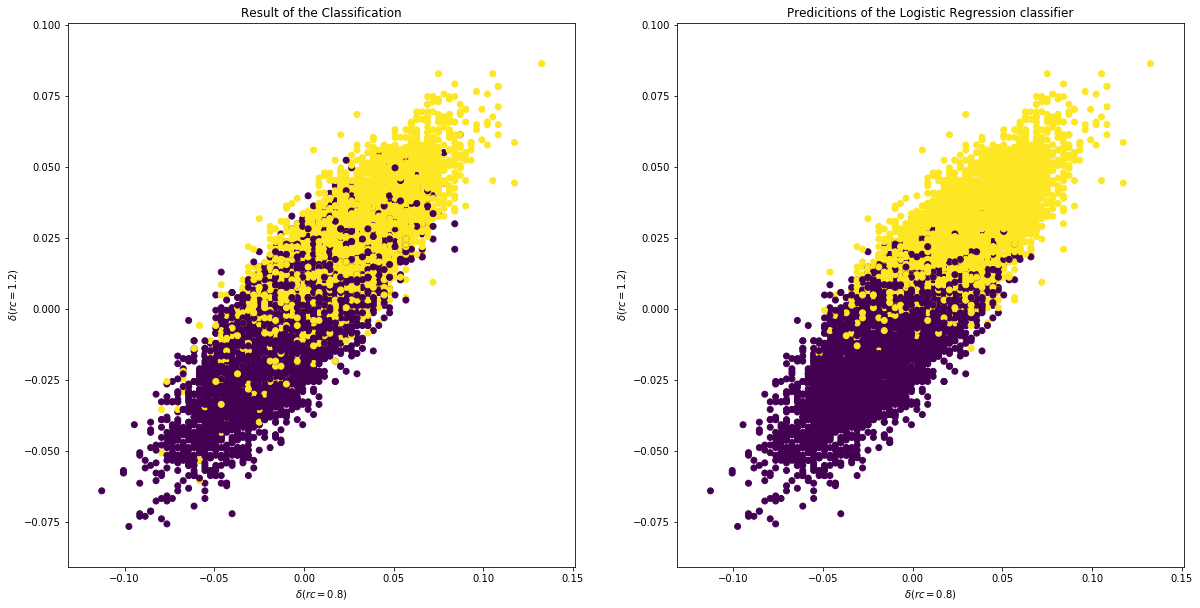

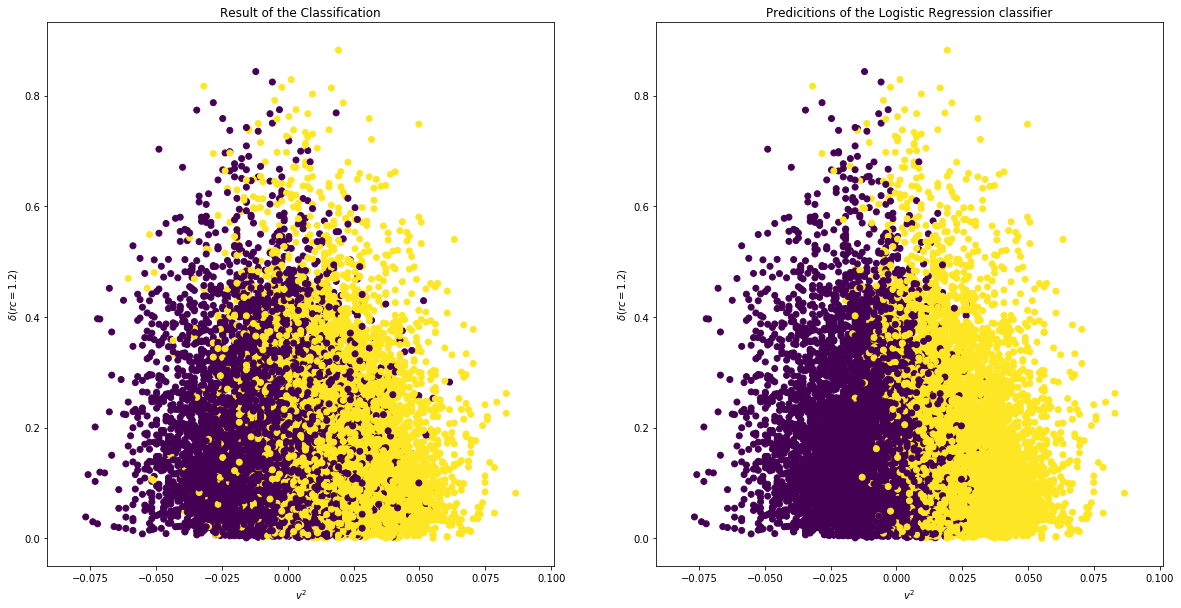

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Result of the Classification')

#ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X_test[:,:2].T, c=Y_test)    

ax = fig.add_subplot(122 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Predicitions of the Logistic Regression classifier')
plt.scatter(*X_test[:,:2].T, c = Y_predict_lg)
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$v^2$', ylabel='$\delta(rc=1.2)$' , title = 'Result of the Classification')

#ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(X_test[:,1].T, X_test[:,-1].T , c=Y_test)    

ax = fig.add_subplot(122 , xlabel = '$v^2$', ylabel='$\delta(rc=1.2)$' , title = 'Predicitions of the Logistic Regression classifier')
plt.scatter(X_test[:,1].T, X_test[:,-1].T , c = Y_predict_lg)
plt.show()

for the firt step of the procedure we want to tune our model in a way which gives us the highest validation, for this purpose we should find the appropriate complexity for the model and the sample size.
to do so we use two usefull concepts.

- Validation curves
- Learning curves

In [16]:
#Over all classification report
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_lg)
print(clf_report)

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      7856
         1.0       0.79      0.79      0.79      7144

    accuracy                           0.80     15000
   macro avg       0.80      0.80      0.80     15000
weighted avg       0.80      0.80      0.80     15000



## Fine Tuning the model:

We should fine tune our model to get the best estimation for this purpose we need to find our hyperparameters.
one way to do so is using validation curves which is training scores versus specific hyperparameter and from them we can find the optimal value of desired hyperparameter.

The appropriate hyperparamether of the Logistic regression is the C value which is the inverse of the regularization.
to finding the best C we plot the validation score versus the score for trainig score and cross_validation score.

### - Validation Curve

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4
 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2
 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.
 9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


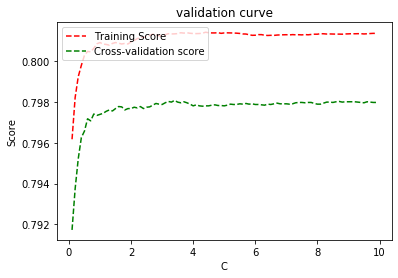

In [9]:
from sklearn.model_selection import validation_curve


param_range = np.arange(.1,10, .1)
print(param_range)

train_scores, test_scores = validation_curve(
classifier, X=X, y=Y,cv=5, param_name="C", param_range=param_range,
scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('C')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()

As can be seen in the plot, the training and cross-validation score does not converge it means that our model suffers from quite high bias but as the both scores are high the variance of the model is not very high.
this is in agreement with our knowledge of logistic regression model which has a high bias and low variance.
around C=2 we get the maximum score for both training and validation and it means that here is the place were we cane minimize the variance of the model, but the bias is really high here. so the model has overfitting.
in a bit higher variance, and around c = 0.5, the difference between training score and validation score and so the bias reduces notably while training score gets lower and in the range of the validation score. it means that choosing such a C will reduce the danger of overfitting in our model.

**optimal value chosen for C = 0.5**

###  - Learning Curve

We should access the amount of our data to find the best sample size for training as well as estimating the bias and variance of the model.
One way to do so is using learning curves which are training score and validation score for different sample sizes. 

In [10]:
from sklearn.model_selection import learning_curve, validation_curve
import pandas as pd
train_sizes = np.arange(1000,48000,1000)

#computing training score and validation score for each sample size cv times
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= classifier , X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5, random_state = 0)

print('Training scores:\n\n', pd.DataFrame( train_scores) )

print('\nValidation scores:\n\n', pd.DataFrame(validation_scores) )

Training scores:

            0         1         2         3         4
0   0.670000  0.753000  0.753000  0.753000  0.753000
1   0.724500  0.835500  0.835500  0.835500  0.835500
2   0.743333  0.842333  0.842333  0.842333  0.842333
3   0.756000  0.827750  0.827750  0.827750  0.827750
4   0.775000  0.818000  0.818000  0.818000  0.818000
5   0.782167  0.809833  0.809833  0.809833  0.809833
6   0.784000  0.804714  0.804714  0.804714  0.804714
7   0.777500  0.805750  0.805750  0.805750  0.805750
8   0.784111  0.807556  0.807556  0.807556  0.807556
9   0.780400  0.806800  0.806800  0.806800  0.806800
10  0.782545  0.804182  0.804182  0.804182  0.804182
11  0.780833  0.803417  0.801500  0.801500  0.801500
12  0.783077  0.806000  0.794385  0.794385  0.794385
13  0.779786  0.802857  0.792214  0.792214  0.792214
14  0.781667  0.801600  0.790667  0.790667  0.790667
15  0.781188  0.799125  0.790687  0.790687  0.790687
16  0.780882  0.798471  0.793471  0.793471  0.793471
17  0.778833  0.796389  0.7

[0.7364     0.8133     0.82253333 0.8134     0.8094     0.8043
 0.80057143 0.8001     0.80286667 0.80152    0.79985455 0.79775
 0.79444615 0.79185714 0.79105333 0.790475   0.79195294 0.79274444
 0.79132632 0.78901    0.78993333 0.7878     0.78996522 0.79064167
 0.790936   0.79081538 0.79163704 0.79185714 0.79282069 0.79201333
 0.79363226 0.79261875 0.79328485 0.79441765 0.79488    0.79489444
 0.79504324 0.79468947 0.79589231 0.79763    0.79871707 0.79932857
 0.79926047 0.80034091 0.7992     0.79925217 0.80051915]
[0.68241939 0.76011862 0.77271738 0.78448382 0.79050065 0.78988405
 0.79088395 0.79263397 0.79126727 0.79211727 0.79221723 0.79288391
 0.79301729 0.79423392 0.7941673  0.79480056 0.79511723 0.79618391
 0.79578392 0.7957506  0.79676726 0.79668394 0.79673391 0.79728392
 0.79716727 0.79605062 0.79533398 0.79543396 0.79575063 0.79573396
 0.79643391 0.79675059 0.79680059 0.79675058 0.79606722 0.79550054
 0.79658388 0.79711722 0.79760055 0.79773389 0.79785054 0.79798388
 0.79795054 

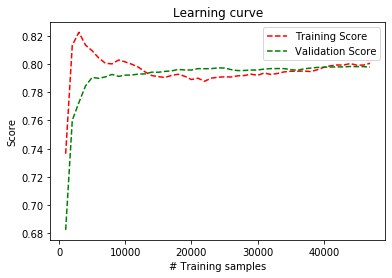

In [11]:
train_scores_mean = train_scores.mean(axis = 1)
print(train_scores_mean)
validation_scores_mean = validation_scores.mean(axis = 1)
print(validation_scores_mean)

plt.title('Learning curve')
plt.plot(ns_list, train_scores_mean,'r--',label = 'Training Score')
plt.plot(ns_list, validation_scores_mean, 'g--', label = 'Validation Score')
plt.xlabel('# Training samples')
plt.ylabel('Score')
plt.legend(loc='upper right')

plt.show()

Around sample size equal to 20000 both training score and validation score approximately get fixed, varying slightly and converge, which means a sample of size 35000 will work quite well.
But we see that the validation curve and trainnig curve are really close to each other for most of the sample sizes it means that our model suffers from high bias and low variance (because the gap between training curve and validation curve is narrow) and so it's subject to under-fitting.

**# training sample = 35000**

### Now we should tune our model with this new values.

In [17]:
#The new training set
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, train_size = 35000 , random_state= 0)

print(len(X_train))
print(len(X_test))
print(len(Y))

35000
25000
60000


In [18]:
#Runnig the tuned model, the penalty is L2
classifier = LogisticRegression(C = 0.7)
%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_lg = classifier.predict(X_test)
%t Y_predict_lg = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_lg[Y_predict_lg == 1]))

102 ms ± 5.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
396 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
25000
11905


It's interesting that our training time reduced and our prediction time increased relative to the past, because our training sample got smaller and our test sample got bigger! 

In [19]:
#Evaluating the new trained model:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_lg)
print(clf_report)

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81     13128
         1.0       0.79      0.79      0.79     11872

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



Now that we have our tuned model it's neccessary to see what different metrics says about our model and it's validation:

## Metrics:
For getting more sense about our classification we can look at the confusion matrix:

### - Confusion matrix

| **True Positive(TP)** || **False Positive(FP)**   |
|------||------|
|   **False Negative(FN)**   || **True Negative(TN)**|


In [20]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test , Y_predict_lg)
print('Here is the confusion matrix for the LG classifier: \n'  )
print('TP = {}'.format(conf_matrix[0][0]),'  FP = {}'.format(conf_matrix[0][1]) , '\n')
print('FN = {}'.format(conf_matrix[1][0]),'  TN = {}'.format(conf_matrix[1][1]) , '\n')


Here is the confusion matrix for the LG classifier: 

TP = 10612   FP = 2516 

FN = 2483   TN = 9389 



Confusion matrix, without normalization
[[10612  2516]
 [ 2483  9389]]
Normalized confusion matrix
[[0.80834857 0.19165143]
 [0.20914757 0.79085243]]


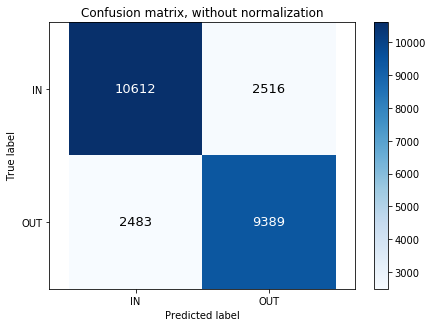

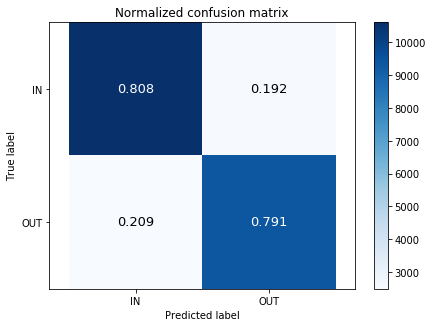

In [21]:
import itertools

class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

We can read the Acurracy from confusion matrix as well, with following formulation:

### - Acurracy  
$Acurracy = \frac{TP + TN}{TP+TN+FP+FN} * 100$ 

Which means the accuracy is the number of correct prediction on the total training size.

In [22]:
acurracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
print('The accuracy of the model is {}%' .format(round(acurracy*100, 3)))

The accuracy of the model is 80.004%


It would also be meaningfull to looking at the precision and recall of the model but as we choosed our data in a way that the size of our to class pe approximately equal there shouldn't be big difference between acurracy and precison:

- ### Precision
The fraction of prediction that we got right = $\frac{TP}{TP+FP}$

- ### Recall 
The fraction of the instances that were predicted correctly = $\frac{TP}{TP+FN}$

As you can see all of the stimators precision, recall and accuracy are quite high, which shows that linear classifiers are appropriate choices for us.

also there should be a trade of between precision and recall which would not let us to higher them as much as we want.

In [23]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(Y_test, Y_predict_lg, pos_label=0)
precision = precision_score(Y_test, Y_predict_lg, pos_label = 0)
print(f"The recall for the LG classifier: \n {round(recall,3)}"  )
print(f"The precision for LG classifier: \n {round(precision,3)}"  )

The recall for the LG classifier: 
 0.808
The precision for LG classifier: 
 0.81


- ### F1 score

For looking at the precision and recall at the same time we can use the F$\beta$ score of the model which is defined as:

$F\beta_{score} = \frac{(1+\beta^2).precision.recall}{\beta^2 precision+recall}$

we use F1 score for our purpose:

In [24]:
F1 = 2*precision*recall / (precision+recall)
print('The F1 score is : {}'.format(round(F1,3)))

The F1 score is : 0.809


- ### Precision - Recall curve

The next task is to se wether we are using the best model parameters or not, logisitc regression model gets point above a threshold value in the sigmoid function as 1 and the points below it as 0.
sklearn's logistic regression function uses the threshold equals to 0.5 as default but we can change the thresold to see wether we are getting the best performance of the model or not.
as there is a trade of between the value of the precision and recall we plotted both of them.

[[0.733093   0.266907  ]
 [0.57329674 0.42670326]
 [0.84961299 0.15038701]
 ...
 [0.85861936 0.14138064]
 [0.66237289 0.33762711]
 [0.54173211 0.45826789]]
[0. 0. 0. ... 0. 0. 0.]


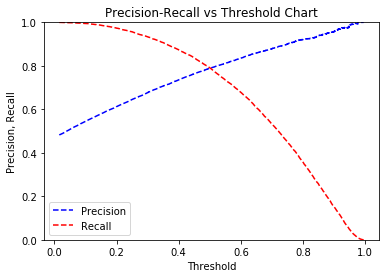

In [26]:
#getting the probability of being in each class from classifier without applying the threshold
Y_probs=classifier.predict_proba(X_test) 
print(Y_probs)
print(Y_predict_lg)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(Y_test , Y_probs[:, 1]) 

#retrieve probability of being 1(in second column of Y_prob)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

As can be seen increasing precision will result in decrease of the recall and vice versa.
the trade of point between precision and recall is where the two curves coincides which is around the threshold = 0.5 and will result in precision and recalls equal to 0.8.
so the used 0.5 threshold resulted in the best possible performance of the Logisitc Regression model. and there is no need to change it.

### -ROC curve (Receiver operating characteristic)

When it is important for us to bounding the error and lower the FP rate as much a possible we can look at the FP rate and the TP rate of the model in place of the precision and recall for different thresholds, the best performance possible can be achieved when the TP rate get closer to one and FP rate get closer to zero, which is not complletely possible as there is a trade of between the FPR and TPR.
if we choose high thresholds we will get all of the test samples in the positive class which will cause to get both FPR  and TPR equal to one. this isn't what we want! so looking at the ROC curves can be helpfull:

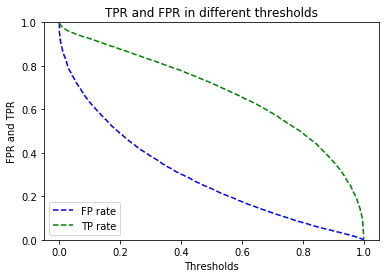

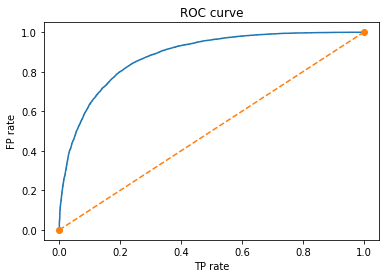

In [27]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_probs[:,1], pos_label=1)

plt.plot(fpr, thresholds , 'b--', label = 'FP rate')
plt.plot(tpr, thresholds , 'g--', label = 'TP rate')
plt.ylabel('FPR and TPR')
plt.xlabel('Thresholds')
plt.title('TPR and FPR in different thresholds')
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()


plt.title('ROC curve')
plt.plot(fpr , tpr)
plt.plot([0, 1], [0, 1] , 'o--')
plt.ylabel('FP rate')
plt.xlabel('TP rate')
plt.show()

The threshold that we choose will result to FPR  arond 0.2 and TPR around 0.8 which again seems to be in the best point possible. lower FPRs will result in lower TPRs as well which we do not like!

- ### AUC (Area under ROC curve)
also AUC which is the area under the ROC curve can be another measure which will help and it gives an overal measure of the performance of our model over all thresholds. The ideal AUC should be very close to one, but as wee can see the behaviour of our TPR and FPR is in a way which we cannot get this ideal value and the model has divergense from idealized one.
but we cannot tune our model with the help of AUC.

the value of AUC score for our model is:

In [28]:
from sklearn.metrics import roc_auc_score
print('The AUC score of our LG  is : {}' .format(round(roc_auc_score(Y_test, Y_probs[:,1]),3)))

The AUC score of our LG  is : 0.882


## Over all report:

| *Model* || *Training time* || *prediction time* || *f1 score* || *ROC AUC* || *Accuracy* |
|------||------||------||------||------||------|
| *Logistic Regression*  || 102 $ms$ || 396 $\mu s$ || 0.809 || 0.882 || 80.004% |